In [1]:
%%javascript
var width = window.innerWidth || document.documentElement.clientWidth || document.body.clientWidth;
var height = window.innerHeight || document.documentElement.clientHeight || document.body.clientHeight;

IPython.notebook.kernel.execute("windowSize = (" + width + "," + height + ")");
// suitable for small screens
nbpresent.mode.tree.set(
    ["app", "theme-manager", "themes", "my-theme"], 
    {
    palette: {
        "blue": { id: "blue", rgb: [0, 153, 204] },
        "black": { id: "black", rgb: [0, 0, 0] },
        "white": { id: "white", rgb: [255, 255, 255] },
        "red": { id: "red", rgb: [240, 32, 32] },
        "gray": { id: "gray", rgb: [128, 128, 128] },
    },
    backgrounds: {
        "my-background": {
            "background-color": "white"
        }
    },
    "text-base": {
        "font-family": "Georgia",
        "font-size": 2.5
    },
    rules: {
        h1: {
            "font-size": 5.5,
            color: "blue",
            "text-align": "center"
        },
        h2: {
            "font-size": 3,
            color: "blue",
            "text-align": "center"
        },
        h3: {
            "font-size": 3,
            color: "black",
        },
        "ul li": {
            "font-size": 2.5,
            color: "black"
        },
        "ul li ul li": {
            "font-size": 2.0,
            color: "black"
        },
        "code": {
            "font-size": 1.6,
        },
        "pre": {
            "font-size": 1.6,
        }
    }
});

<IPython.core.display.Javascript object>

# Inferring Ancestory using HMMs

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/NucleoDice.png">

* This lecture is key for Problem Set #5

<p style="text-align: right; clear: right;">1</p>

# Decoding Problem Solution

* The *Decoding Problem* is equivalent to finding a longest path in the *directed acyclic graph* (DAG), where "longest" is defined as the maximum product of the probabilities along the path.

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L24FairCasinoViterbi.png">

<p style="text-align: right; clear: right;">2</p>

# Viterbi Decoding Algorithm

* Since the *longest path* is a product of edge weights, if we use the **log** of the weights we can make it a sum again!
* The value of the product can become extremely small, which leads to underflow.
* Logs avoid underflow (precision loss due to adding numbers of vastly different magnitudes) 

$$
		s_{k,i+1} = \log(e_l(x_{i+1})) + \max_{k \in Q } \{s_{k,i}  + \log(a_{kl})\}
$$

<p style="text-align: right; clear: right;">3</p>

# Viterbi Decoding Problem (cont)

* Every path in the graph has the probability $P(x|\pi)$.
* The Viterbi decoding algorithm finds the path that maximizes P(x|π) among all possible paths.
* The Viterbi decoding algorithm runs in $O(n|Q|^2)$ time (length of sequence times number of states squared).
* The Viterbi decoding algorithm can be efficiently implemented as a dynamic program

Dynamic Program's Recursion

$$\begin{align}
s_{l,i+1} &= \max_{k \in Q} \{ s_{k,i} \cdot \text{weight of edge between } (k,i) \text{ and } (l,i+1) \}\\
          &=  \max_{k \in Q} \{ s_{k,i} \cdot  a_{kl} \cdot e_l (x_{i+1}) \}\\
          &= e_l(x_{i+1}) \cdot \max_{k \in Q} \{ s_{k,i} \cdot a_{kl} \}
\end{align}$$

<p style="text-align: right; clear: right;">4</p>

# Viterbi  Example

* Solves all subproblems implied by observed sequence
* How likely is this path? *0.006*
* What is it? ***BBBBBB***

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L25ViterbiExample.png">

<p style="text-align: right; clear: right;">5</p>

# How likely is most likely?

* The "most likely path" may not be a lot more likely than a 2nd or 3rd most likely paths (more so in more realistic cases than this one).
* Actual probability of the "most likely path” is not that high.

<pre style="font-size: 70%;">
       P     &pi;            P     &pi;            P     &pi;           P     &pi;
    0.0058 BBBBBB      0.0001 BBBFFB      0.0000 FFFBFF     0.0000 FBBFBF
    0.0046 FFFFFF      0.0001 FFFFBF      0.0000 FFBFBB     0.0000 BFBBFF
    0.0013 FBBBBB      0.0001 FFBFFF      0.0000 FBFFBB     0.0000 BFFBBF
    0.0012 FFFFBB      0.0001 FBFFFF      0.0000 FBBFFB     0.0000 BBFBFF
    0.0009 FFBBBB      0.0001 FFBBBF      0.0000 FFBFFB     0.0000 FFBFBF
    0.0008 FFFFFB      0.0001 BFFFBB      0.0000 FBFFFB     0.0000 FBFFBF
    0.0006 FFFBBB      0.0001 FBBBFF      0.0000 FBFBBB     0.0000 BFFBFF
    0.0006 BBBFFF      0.0001 BBFFFB      0.0000 FBBBFB     0.0000 BFBFBB
    0.0004 BBBBBF      0.0000 BFBBBB      0.0000 BBBFBF     0.0000 FBFBBF
    0.0004 BBFFFF      0.0000 BBBBFB      0.0000 FFBBFB     0.0000 BFBFFB
    0.0003 BBBBFF      0.0000 BBFBBB      0.0000 BBFFBF     0.0000 FBFBFF
    0.0003 BFFFFF      0.0000 BFFFFB      0.0000 BFFFBF     0.0000 BFBBFB
    0.0001 BBBFBB      0.0000 FFFBBF      0.0000 BFBFFF     0.0000 BBFBFB
    0.0001 FBBFFF      0.0000 FFBBFF      0.0000 FFFBFB     0.0000 BFFBFB
    0.0001 FBBBBF      0.0000 FBBFBB      0.0000 BFBBBF     0.0000 FBFBFB
    0.0001 BBFFBB      0.0000 BFFBBB      0.0000 BBFBBF     0.0000 BFBFBF
</pre>

<p style="text-align: right; clear: right;">6</p>

# HMMs in Biology

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L25CollaborativeCross.png" style="float: right; margin: 0px 50px;">
* Inferring ancestral contributions to a descendant
* Collaborative Cross project 
* Maintained at UNC since 2006
* Objective:
   - Create new reproducible<br>
   mouse strains by randomly<br>
   combining the genomes of<br>
   eight diverse mice strains
* Problem:
   - Given an extant strain,<br>
   which parts of its genome<br>
   came from which founder

<p style="text-align: right; clear: right;">7</p>

# Mixing Genomes

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L25BreedingFunnel.png" style="float: right; margin: 0px 50px;">
* A randomized breeding scheme was used to
    - Mix the genomes by recombination
    - Fix the genomes by selective inbreeding
* A breeding funnel
    - 8 genomes go in
    - A mosaic comes out
* Genotyping was used to track founder contributions

<p style="text-align: right; clear: right;">8</p>

# A Genome Mosaic

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L25Mosaic.png" width="400px" style="float: right; margin: 0px 80px;">

* A Hidden Markov Model is used to infer the "hidden" state of which of the 8 founders contributed to which parts of the genome
* A Viterbi Solution finds the most likely mosaic given a set of genotypes

<p style="text-align: right; clear: right;">9</p>

# Genotyping Microarrays

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L25Microarrays.png" width="500px" style="float: right; margin: 0px 50px;">

* DNA probes to query the state of specific “known” and “informative”<br>
Single Nucleotide Polymorphisms (SNPs)
* Each probe distinguishes 4 cases<br>
("Ref", "Alt", "H", "N")
* From these observations we infer the founder at every marker

<p style="text-align: right; clear: right;">10</p>

# Example Genotypes

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L25Genotypes.png" style="float: right; margin: 0px 50px;">

* Genotypes for a chromosome
* 8112 probes with position of variant
* Alleles are indicated by the nucleotide
* Rarely can a single maker resolve the founder
* Which strain would you guess for the beginning?

<p style="text-align: right; clear: right;">11</p>

# Noise

* One last issue, between 1% and 5% of genotypes are simply wrong
* Technical errors
    - A probe didn't glow bright enough
    - A section of the array was damaged<br>
    (fingerprints, cracks, hair, etc.)
    - Messed up fabricating a probe’s sequence
    - DNA was contaminated
* Error types:
    - Unexpected calls (observation is uninformative)
    - A possible, but incorrect call

<p style="text-align: right; clear: right;">12</p>

# Read Genotypes

In [62]:
fp = open("data/genotypes.csv", 'rU')
data = fp.read().split('\n')        # break file into lines
fp.close()
header = data.pop(0).split(',')     # First line is header
while (len(data[-1].strip()) < 1):  # remove extra lines
    data.pop()
for i, line in enumerate(data):     # make a list from each row
    field = line.split(',')
    field[1] = int(field[1])        # convert position to integer
    data[i] = field
fp.close()

print header
print "Number of probes", len(data)
for i in xrange(1000,1005):
    print "data[%d] = %s" % (i, data[i])

['chromosome', 'position', 'A/J', 'C57BL/6J', '129S1/SvImJ', 'NOD/ShiLtJ', 'NZO/H1LtJ', 'CAST/EiJ', 'PWK/PhJ', 'WSB/EiJ', 'OR3199m266']
Number of probes 8112
data[1000] = ['2', 25896880, 'T', 'C', 'C', 'C', 'T', 'C', 'T', 'T', 'T']
data[1001] = ['2', 25914367, 'A', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G']
data[1002] = ['2', 25936735, 'T', 'T', 'T', 'T', 'C', 'C', 'T', 'T', 'T']
data[1003] = ['2', 25940660, 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'G']
data[1004] = ['2', 25947335, 'C', 'C', 'C', 'C', 'C', 'C', 'A', 'C', 'C']


<p style="text-align: right; clear: right;">13</p>

In [88]:
# Code to examine the Emission probabilities

i = int(raw_input("Enter locus [0, %d] to see its Emission probability:" % len(data)))

print data[i]
Nstates = 8
ErrorRate = 0.05
# Count expected genotypes
count = dict([(call, data[i][2:2+Nstates].count(call)) for call in "ACGTHN"])
print "          ", ', '.join(["%8s" % v[0:8] for v in header[2:2+Nstates]])
for base in count.keys():
    # Compute emission probability, assuming 5% error rate
    if (count[base] == 0):
        emission = [1.0/Nstates for j in xrange(2,2+Nstates)]   # unexpected 
    else:
        emission = [(1.0 - ErrorRate)/count[base] if data[i][j] == base else ErrorRate/(Nstates - count[base])
                    for j in xrange(2,2+Nstates)]
    emission = ["%6.4f" % v for v in emission]
    print "    %s: %2d %s" % (base, count[base], emission)


Enter locus [0, 8112] to see its Emission probability:1500
['2', 34819156, 'A', 'A', 'A', 'A', 'G', 'G', 'A', 'G', 'G']
                A/J, C57BL/6J, 129S1/Sv, NOD/ShiL, NZO/H1Lt, CAST/EiJ,  PWK/PhJ,  WSB/EiJ
    A:  5 ['0.1900', '0.1900', '0.1900', '0.1900', '0.0167', '0.0167', '0.1900', '0.0167']
    C:  0 ['0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250']
    G:  3 ['0.0100', '0.0100', '0.0100', '0.0100', '0.3167', '0.3167', '0.0100', '0.3167']
    H:  0 ['0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250']
    N:  0 ['0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250']
    T:  0 ['0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250', '0.1250']


# Viterbi Dynamic Program

In [57]:
from math import exp, log10

Nstates = 8
prevpos = 1
state = [[(float(len(data)),i) for i in xrange(Nstates)]]   # (log(p), PathToHere)
for i in xrange(len(data)):
    # Count expected genotypes
    count = dict([(call, data[i][2:2+Nstates].count(call)) for call in "ACGTHN"])
    # Get the target genotype at this probe
    observed = data[i][-1]
    # Compute emission probability, assuming 5% error rate
    if (count[observed] == 0):
        emission = [1.0/Nstates for j in xrange(2,2+Nstates)]   # unexpected 
    else:
        emission = [0.95/count[data[i][j]] if data[i][j] == observed else 0.05/(Nstates - count[data[i][j]])
                    for j in xrange(2,2+Nstates)]
    # compute transition probability
    position = data[i][1]
    delta = position - prevpos
    prevpos = position
    stay = ((Nstates - 1.0)*exp(-delta/10000000.0) + 1.0)/Nstates
    switch = (1.0 - stay)/(Nstates - 1.0)
    # update state probailities for all paths leading to the ith state
    path = []
    for j in xrange(Nstates):
        choices = [(log10(emission[j])+(log10(stay) if (k==j) else log10(switch))+state[-1][k][0],k)
                   for k in xrange(Nstates)]
        path.append(max(choices))
    state.append(path)
print "Length of paths:", len(state)

Length of paths: 8113


<p style="text-align: right; clear: right;">14</p>

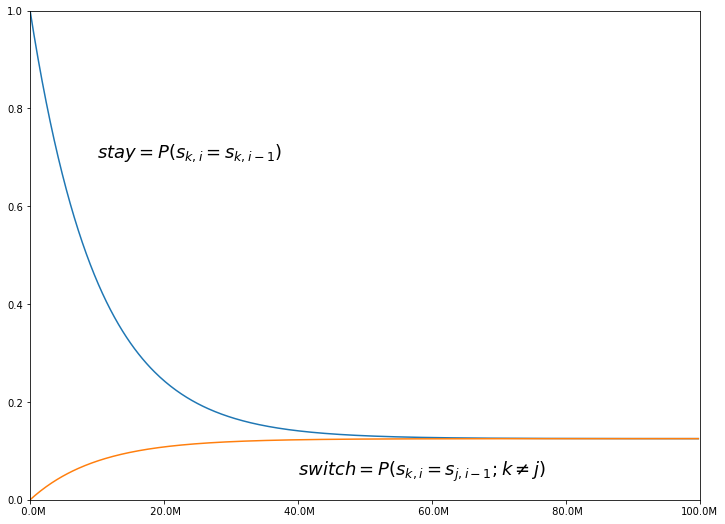

In [61]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plot

fig = plot.figure(figsize = (12,9))
axes = fig.add_subplot(111)

Nstates = 8
scale = 10000000.0
x = numpy.arange(0,100000000.0,200000.0)
stay = ((Nstates - 1.0) * numpy.exp(-x/scale) + 1.0) / Nstates 
switch = (1.0 - stay) / (Nstates - 1.0)

plot.plot(x, stay, x, switch)
plot.text(10000000, 0.7, r'$stay = P(s_{k,i} = s_{k,i-1})$', size="18")
plot.text(40000000, 0.05, r'$switch = P(s_{k,i} = s_{j,i-1}; k \neq j)$', size="18")
plot.xlim((0,100000000.0))
plot.ylim((0,1.0))
pos, labels = plot.xticks()
result = plot.xticks(pos, ["%5.1fM" % (p/1000000) for p in pos])

# Transition Probability

* Recombination likelihood is modeled using an exponential distribution
* Recombinations between nearby probes are unlikely
* Distant probes are more likely to be from other founders

<p style="text-align: right; clear: right;">15</p>

# Backtracking

In [54]:
# backtrack
path = state[-1]
maxi = 0
maxp = path[0][0]
for i in xrange(1,Nstates):
    if (path[i][0] > maxp):
        maxp = path[i][0]
        maxi = i
print maxi, path[maxi], header[2+maxi]

for j in xrange(len(state)-2,-1,-1):
    data[j].append(header[2+maxi])
    maxi = state[j+1][maxi][1]

header.append("Founder")
fp = open("result.csv", 'w')
fp.write(','.join(header)+'\n')
for row in data:
    fp.write(','.join([str(v) for v in row])+'\n')
fp.close()

5 (2743.7737749674434, 5) CAST/EiJ


<p style="text-align: right; clear: right;">16</p>

# Output

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L25Output.png" style="float: right; margin: 0px 50px;">
* The inferred Mosaic
* Repeat for every chromosome
* Most likely, but how likely?
* Other approaches
<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L25Haplotype.png" style="margin-top: 50px;">
<p style="text-align: right; clear: right;">17</p>

# Back to the Casino with new questions

* Are there common aspects of the most likely solutions?
* Which coin was I most likely using on the 4<sup>th</sup> roll

<pre>
       P     &pi;            P     &pi;            P     &pi;           P     &pi;
    0.0058 BBBBBB      0.0001 BBBFFB      0.0000 FFFBFF     0.0000 FBBFBF
    0.0046 FFFFFF      0.0001 FFFFBF      0.0000 FFBFBB     0.0000 BFBBFF
    0.0013 FBBBBB      0.0001 FFBFFF      0.0000 FBFFBB     0.0000 BFFBBF
    0.0012 FFFFBB      0.0001 FBFFFF      0.0000 FBBFFB     0.0000 BBFBFF
    0.0009 FFBBBB      0.0001 FFBBBF      0.0000 FFBFFB     0.0000 FFBFBF
    0.0008 FFFFFB      0.0001 BFFFBB      0.0000 FBFFFB     0.0000 FBFFBF
    0.0006 FFFBBB      0.0001 FBBBFF      0.0000 FBFBBB     0.0000 BFFBFF
    0.0006 BBBFFF      0.0001 BBFFFB      0.0000 FBBBFB     0.0000 BFBFBB
    0.0004 BBBBBF      0.0000 BFBBBB      0.0000 BBBFBF     0.0000 FBFBBF
    0.0004 BBFFFF      0.0000 BBBBFB      0.0000 FFBBFB     0.0000 BFBFFB
    0.0003 BBBBFF      0.0000 BBFBBB      0.0000 BBFFBF     0.0000 FBFBFF
    0.0003 BFFFFF      0.0000 BFFFFB      0.0000 BFFFBF     0.0000 BFBBFB
    0.0001 BBBFBB      0.0000 FFFBBF      0.0000 BFBFFF     0.0000 BBFBFB
    0.0001 FBBFFF      0.0000 FFBBFF      0.0000 FFFBFB     0.0000 BFFBFB
    0.0001 FBBBBF      0.0000 FBBFBB      0.0000 BFBBBF     0.0000 FBFBFB
    0.0001 BBFFBB      0.0000 BFFBBB      0.0000 BBFBBF     0.0000 BFBFBF
</pre>

<p style="text-align: right; clear: right;">18</p>

# Forward-Backward Problem

**Given:** A sequence of coin tosses generated by an HMM.

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/UnfairCasinoHMM.png" width="300px">

**Goal:** Find the most probable coin that was in use at a particular flip.

$$
P(\pi_i = k | x) = \frac{P(x,\pi_i = k)}{P(x)}
$$

Where $P(x,\pi_i = k)$ is the probabilites of all paths in state *k* at *i*, and $P(x)$ is the probability of sequence *x*.
<p style="text-align: right; clear: right;">19</p>

# Illustrating the difference

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L25ForwardBackward.png">

<p style="text-align: right; clear: right;">20</p>

# Forward Algorithm

* Define $f_{k,i}$ (forward probability) as the probability of emitting the prefix $x_1…x_i$ and reaching the state $\pi_i = k$.


* The recurrence for the forward algorithm is:

$$
f_{k,i} = e_k(x_i) \cdot \sum_{l \in Q} f_{l,i-1} \cdot A_{l,k}
$$


* Same as Viterbi, excepts stops at *k*

<p style="text-align: right; clear: right;">21</p>

# Backward Algorithm

However, *forward probability* is not the only factor effecting $P(\pi_i = k|x)$.

* The sequence of transitions and emissions that the HMM undergoes between $\pi_i$ and $\pi_{i+1}$ also affect $P(\pi_i = k|x)$.

* *Backward probability* $b_{k,i}$ ≡ the probability of being in state $\pi_i = k$ and emitting the suffix $x_{i+1}…x_n$.

* The backward algorithm’s recurrence:

$$
b_{k,i} = \sum_{l \in Q} e_l(x_{i+1}) \cdot b_{l,i+1} \cdot A_{k,l}
$$

<p style="text-align: right; clear: right;">22</p>

# Forward-Backward Algorithm

* The probability that the dealer used a biased coin at any moment *i* is as follows:

$$
P(\pi_i = k | x) = \frac{P(x,\pi_i = k)}{P(x)} = \frac{f_k(i) \cdot b_k(i)}{P(x)}
$$

* So, to find $P(\pi_i = k|x)$ for all $i$, we solve two dynamic programs

    - One from beginning to end
    - One from the end to the beginning
    - Combine the corresponding states 

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/L25FBcalculation.png" width="600px">

<p style="text-align: right; clear: right;">23</p>

# Next Time


### Genome Rearrangements

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/GenomeRearrangement.png">

<p style="text-align: right; clear: right;">24</p>

In [87]:
0.05/3

0.016666666666666666